# Probabilistic Models

## Overview

The probabilistic models use the idea of probability to describe the data or classify new entities. probabilistic models see features and target variables as random variables. there are two types of probabilistic models:
   1. Discriminative
   2. Generative<br>

Discriminative probability models (also called conditional probabilistic models or predictive probabilistic models) use the idea of conditional probability distribution ${p(y\vert X)}$ which ${y}$ can be predicted from ${X}$. generative models estimate ${p(X)}$, the probability of observing ${X}$, or joint distribution ${p(X,y)}$, which then can be used to drive any conditional distribution involving the same variables.<br>
we already talk about discriminative probabilistic models like KNN and Logistic Regression (they can be describe as probabilistic or not), so what are we going to do next is to talk about generative models.

## Generative Models

as we said before, a generative model describes how data is generated, in terms of a probabilistic model. we can describe the workflow of generative modeling as this:
   * We have a dataset of observations X (with or without labels)
   * we assume that the observations have been generated according to some unknown distribution ${p}_{data}$.
   * a generative model ${p}_{model}$ tries to mimic ${p}_{data}$. if we achieve this goal, we can sample from ${p}_{model}$ to generate observations that appear to have been drawn from ${p}_{data}$.
   * We are impressed by ${p}_{model}$ if:
       * it can generate examples that appear to have been drawn from ${p}_{data}$.
       * it can generate examples that are suitably different from observations in ${X}$. in other words, the model shouldn't simply reproduce things it has.<br>

but how to find our approximate probability?<br> 
1. first we define a Probability Density Function (PDF). PDF is a function that maps point ${x}$ in sample space to a number between 0 and 1. the sum of all the density functions over all the points in the sample space must be equal to 1 so that it is a well-defined probability distribution.<br>
2. we know that there is only one true density function ${p}_{data}$ exists, but there are infinite numbers of ${p}_{model}$ that we can find to estimate our ${p}_{data}$. so in second step we use parametric modeling to find suitable ${p}_{model}$. in this approach, we will assign some finite parameters to describe our ${p}_{model}$ so we will have ${p}_{\theta}(X)$ which is a probability density function with parameter $\theta$.
3. now to compare our ${p}_{model}$ with ${p}_{data}$ we need some metrics, so we will use **Kullback-Leibler Divergence** (KL), which is measure similarity between two distribution. the KL divergence is always equal to or bigger than zero (if two distributions are the same, it is zero), so our goal is to minimize KL divergence. using the KL formula (and Monte Carlo Estimation) we can show that instead of minimizing KL divergence we can maximize **likelihood** of ${p}_{\theta}(X)$. the likelihood is the output of our pdf and can define as:<br>

    $${L(\theta\vert X)} = {p}_{\theta}(X)$$<br>
   so the likelihood of parameter $\theta$ given ${X}$, is the value of pdf which is parameterized by $\theta$, at point ${X}$. because of some computational difficulty and also statistical reasons (if you derive the formula from KL divergence, you end up with the log form of ${p}_{\theta}(X)$) we use log-likelihood which is simply calculated by performing log function on our likelihood so log-likelihood will be:
   
   $${l(\theta\vert X)} = {\ln}{p}_{\theta}(X)$$<br>
   
   we want to find some $\theta^{*}$ (which is called Maximum Likelihood Estimate or MLE) that maximizes the log-likelihood of observing data ${X}$:
   
   $$\theta^{*} = \underset{\theta}{\textrm{arg max}} {l(\theta\vert X)}$$

now that we approximate our data distribution with ${p}_{\theta}(X)$ or ${p}_{\theta}(X,y)$ (because all the above formula can be derived for ${p}_{\theta}(X,y)$ similarly), we can use it to solve any downstream task like, classification, clustering, outliers detection, generation, etc. let's talk about some of these tasks and their corresponding methods.

### Classification using generative models

classification is a supervised task and its goal is to construct a model using the training dataset, to predict the labels of a new dataset. so we will have ${(X^{(i)},y^{(i)})}$. so in order to classify data, generative models try to approximate joint probability distribution ${p}_{\theta}(X,y)$. in order to approximate our joint probability we use the idea of conditional probability so:<br>

$${p}_{\theta}(X,y) = {p}_{\theta}(X\vert y) . {p}_{\theta}(y)$$<br>

the first term is called **likelihood** which is the probability of observing ${X}$ assuming that the true class is ${y}$ and the second term is called **prior probability**. now we need to estimate these two probabilities using our training dataset.<br>

* **Estimating ${p}(y_{i})$, prior probability of class $y_{i}$:**<br>
we are estimating prior probability with the number of occurrences of class ${i}$ in our training dataset, but in general, we can use other numbers from other sources too. so we will have:<br>

$$ {p}({y}_{i}) = \frac{m_{i}}{m} $$<br>

* **Estimating ${p}_{\theta}(X\vert y_{i})$, likelihood of class ${y}_{i}$:**
    1. Numerical features<br>
        when we have numerical features we assume that each class ${y}_{i}$ is normally distributed which means each class has parameter **mean** $\mu_{i}$ and **covariance**  $\Sigma_{i}$. both parameters are estimated from the subset of data with corresponding labels. the probability density function for **Normal Distribution** at X is given as:<br>
        $$ f_{i}(X) = f(X\vert \mu_{i}, \Sigma_{i}) = \frac{1}{(\sqrt{2\pi})^{n} (\sqrt{\vert \Sigma_{i} \vert})}exp (- \frac{(X-\mu_{i})^{T} \Sigma_{i}^{-1} (X-\mu_{i})}{2})$$<br>
        
   and by doing some math we can derive the maximum likelihood estimation of our parameter as:<br>
        
        $\hat{\mu_{i}} = \frac{1}{m_{i}} \sum \limits _{x_{j}\in y_{i}} X_{j}$<br>
        
        $\hat{\Sigma_{i}} = \frac{1}{m_{i}} \bar{X}_{i}^{T}\bar{X}_{i}\space,\space \space \space \space \space \bar{X}_{i} = {X}_{i} - \hat{\mu_{i}}$<br>
        
  2. Categorical features<br>
   when we have categorical features, we use **Multinomial Distribution** to estimate likelihood. the number of parameters is all the possible combinations of our categorical values. for example, if we have 2 features and one feature has 3 unique categories, and the other one has 4, the number of parameters will be:<br>
d = 3 $\times$ 4 = 12<br>

   then the maximum likelihood for each parameter will be:<br>

   $\hat{\theta}_{ij} = \frac{m_{ij} + 1}{m_{i} + d}$<br>
   ${m}_{ij}$ : number of time that category combination occur in class ${i}$ subset<br>
   ${m}_{i}$ : number of samples in class ${i}$ subset<br>
   ${d}$ : total number of parameters<br>
   ${+1}$: Laplace Smoothing, because of combination that may not occur in our dataset and to prevent them from becoming zero.<br>
        
        
* **Prediction phase:**<br>
    after we estimate our parameters and use them to estimate prior probability and likelihood then we can predict our label of new data with: <br>
    
     $ \hat{y} = \underset{y_{i}}{\textrm{arg max}}\{{p}_{\theta}(X\vert y_{i}) . {p}(y_{i})\} $<br>
    or use log form for mathematical and statistical reasons:<br>
   
     $ \hat{y} = \underset{y_{i}}{\textrm{arg max}}\{\ln{p}_{\theta}(X\vert y_{i}) + \ln{p}(y_{i})\} $<br>
    
   we also can calculate ${p}(y_{i}\vert X)$, called **Posterior Probability** which is the probability of observing ${X}$ from any of the classes. by using **Bayes theorem** the posterior probability is:<br>
    
    ${p}(y_{i}\vert X) = \frac{{p}(X\vert y_{i}) . {p}(y_{i})}{p(X)}\space \space$   , $\space P(X) = \sum \limits _{i}{p}(X\vert y_{i}) . {p}(y_{i}) $<br>
    
**NOTE:** but why use normal distribution? well in general you can use any distribution to model your problem but normal distribution have some properties that make it preferable:<br>
   1. it is the most common distribution found in nature, so there is a good chance your distribution is one of them.
   2. it has the most intuitive parameters. we normally have a good sense of mean and variance (covariance).
   3. another reason, or maybe the most important one, is because of **Central Limit Theorem** which says if we collect several subsets of any random distribution (arbitrary distribution) and calculate all the means of these subsets, the distribution of those means will be normally distributed, and we can perform any statistical procedure on the normally distributed means.<br>

so normal distribution is a good choice, but you always can test other distributions on your dataset.<br>
by using the normal distribution for estimating our probabilities we will end up with the family of methods called **Gaussian Discriminant Analysis** or GDA. we first talk about the general form of the GDA and then derive other variations too.

#### Gaussian Discriminant Analysis

in GDA we estimate our likelihood with gaussian distribution, so for each class, we will have $\mu_{i}$ , $\Sigma_{i}$ and again the goal is to model distribution for each class and classify new data. Let's first write the GDA algorithm then code it from scratch and test it on our breast cancer dataset.

##### Pseudo code for GDA

1. create class specific subsets from training dataset ${X_{i}}$
2. calculate number of samples in each subsets ${m_{i}}$
3. calculate prior probabilities $\hat{p}({y}_{i}) = \frac{m_{i}}{m}$
4. calculate mean of each class subset $\hat{\mu_{i}}$
5. calculate centered subsets $\bar{X}_{i} = {X_{i}} - \hat{\mu_{i}}$
6. calculate covariance $\hat{\Sigma_{i}} = \frac{1}{m_{i}} \bar{X}_{i}^{T}\bar{X}_{i}$
7. calculate determinant and inverse of covariance matrix $\vert\Sigma_{i}\vert$ , $\Sigma_{i}^{-1}$
8. calculate pdf using multivariate gaussian formula ${f}_{i}(X\vert \hat{\mu_{i}},\hat{\Sigma_{i}})$
9. prediction phase $ \hat{y} = \underset{y_{i}}{\textrm{argmax}}\{{f}_{i}(X\vert \hat{\mu_{i}} . \hat{p}({y}_{i})\} $<br>

by using log function and doing some math we can simplify step 8 and 9, and use this formula in prediction phase:<br>

$ \hat{y} = \underset{y_{i}}{\textrm{argmax}}\{\ln{p}(y_{i}) - \frac{1}{2}\ln\vert\Sigma_{i}\vert - \frac{1}{2}(X-\mu_{i})^{T} \Sigma_{i}^{-1} (X-\mu_{i})\}$

##### GDA from scratch

In [1]:
import numpy as np
from numpy.linalg import multi_dot
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [3]:
# class specific subsets
X1 = X_train[y_train==1]
X0 = X_train[y_train==0]

In [4]:
#number of samples in each class and all the samples + number of features
m1 = X1.shape[0]
m0 = X0.shape[0]
m,n = X_train.shape

In [5]:
# Prior probabilities
p1 = m1/m
p0 = m0/m

In [6]:
# mean of each class subset
mu1 = np.mean(X1,axis=0,keepdims=True)
mu0 = np.mean(X0,axis=0,keepdims=True)
mu1.shape

(1, 30)

In [7]:
#calculating covariance matrix and its inverse and determinant
X1 = X1 - mu1
X0 = X0 - mu0
# cov1 = (np.dot(X1.T,X1))/(m1-1)
cov1 = np.cov(X1,rowvar=False)
cov0 = np.cov(X0,rowvar=False)
invcov1 = np.linalg.inv(cov1)
invcov0 = np.linalg.inv(cov0)
detcov1 = np.linalg.det(cov1)
detcov0 = np.linalg.det(cov0)

In [8]:
# prediction phase
y_predict = []
for i in range(len(X_test)):
    Q1 = (multi_dot([(X_test[i]-mu1),invcov1,(X_test[i]-mu1).T]))/2
    Q0 = (multi_dot([(X_test[i]-mu0),invcov0,(X_test[i]-mu0).T]))/2
    f1 = np.log(p1) - (np.log(detcov1))/2 - Q1
    f0 = np.log(p0) - (np.log(detcov0))/2 - Q0
    y_predict.append(np.argmax([f0,f1]))

In [9]:
# calculate accuracy
y_predict = np.array(y_predict)
accuracy = np.sum(y_predict == y_test)/len(X_test)
accuracy

0.9473684210526315

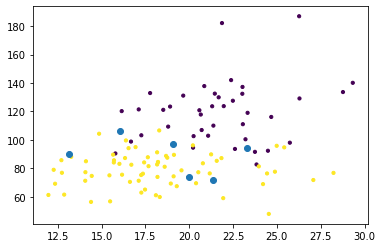

In [10]:
miss_classify = np.where(y_test!=y_predict)
plt.scatter(X_test[:,1],X_test[:,2],c=y_predict,s=10)
plt.scatter(X_test[miss_classify,1],X_test[miss_classify,2])

the blue points are the samples that our model miss-classified

##### GDA in scikit learn

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [12]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
qda.score(X_test,y_test)

0.9473684210526315

same accuracy so we should be happy now :)

**NOTES:**<br>
* what we discussed was a general form of GDA and it is also called Quadratic Discriminant Analysis (QDA) because it will create a quadratic hyperplane between our classes.
* in QDA because we have to calculate the inverse of the covariance matrix, we may end up with the singularity problem, especially in the case of high dimensional data, the common techniques to fix it are:
    * Apply PCA to reduce dimensions
    * regularize the covariance matrices
    * use Pseudo inverse


##### Linear Discriminant Analysis

Linear Discriminant Analysis or LDA is special case of GDA, which instead of using covariance matrix for each class, use same covariance matrix for all classes. we can use this formula for calculate the covariance matrix:

$$\Sigma = \frac{1}{m}\sum\sum(X-\mu_{i})(X-\mu_{i})^{T}$$<br>

in prediction phase, we can also use these formula:<br>
$$ \hat{y} = \underset{y_{i}}{\textrm{argmax}}\{\ln{p}(y_{i}) + X^{T}\Sigma^{-1}\mu_{i} - \frac{1}{2}\mu_{i}^{T} \Sigma^{-1} \mu_{i}\}$$

###### LDA from scratch

In [13]:
#class specific subsets
X1 = X_train[y_train==1]
X0 = X_train[y_train==0]
#number of samples in subsets and original dataset + number of samples
m1 = X1.shape[0]
m0 = X0.shape[0]
m,n = X_train.shape

In [14]:
#prior probability
p1 = m1/m
p0 = m0/m

In [15]:
# mean of subsets
mu1 = np.mean(X1,axis=0,keepdims=True)
mu0 = np.mean(X0,axis=0,keepdims=True)
# centered subsets
X1 = X1 - mu1
X0 = X0 - mu0

In [16]:
#calculate covariance matrix and its inverse
XX1 = np.dot(X1.T,X1)
XX0 = np.dot(X0.T,X0)
cov = (XX1+XX0)/(m)
invcov = np.linalg.inv(cov)

In [17]:
#prediction phase
y_predict = []
for i in range(len(X_test)):
    Q1 = (multi_dot([X_test[i],invcov,mu1.T]))
    Q0 = (multi_dot([X_test[i],invcov,mu0.T]))
    f1 = np.log(p1) - (multi_dot([mu1,invcov,mu1.T]))/2 + Q1
    f0 = np.log(p0) - (multi_dot([mu0,invcov,mu0.T]))/2 + Q0
    y_predict.append(np.argmax([f0,f1]))

In [18]:
#accuracy
y_predict = np.array(y_predict)
accuracy = np.sum(y_predict == y_test)/len(X_test)
accuracy

0.956140350877193

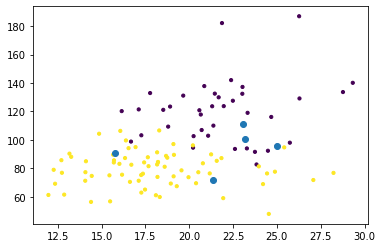

In [19]:
miss_classify = np.where(y_test!=y_predict)
plt.figure
plt.scatter(X_test[:,1],X_test[:,2],c=y_predict,s=10)
plt.scatter(X_test[miss_classify,1],X_test[miss_classify,2])

###### LDA in scikit learn

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train,y_train)
lda.score(X_test,y_test)

0.956140350877193

**NOTES:**<br>
* in LDA hyperplane will be linear
* like GDA, in LDA we will have singularity issue
* we can also use LDA for dimensionality reduction (see dimensionality reduction chapter)

##### Naive Bayes

A Naive Bayes classifier is another variation of GDA which assumes that all the features are **independent** from each other. with this assumption, we don't need to calculate the covariance matrix and we just need variance which is very computationally preferable. also, we can calculate the likelihood of each feature separate from each other and our total likelihood will be the product of each feature likelihood, so we can treat each column separately. but of course we will lose some accuracy. so we will have:<br>

$${f}_{i}(X) = \prod \limits _{j} ^{n} {f}_{ij}(x_{j}) $$<br>

$$\hat{y} = \underset{y_{i}}{\textrm{argmax}}\{\ln{p}(y_{i}) -\frac{1}{2}\sum \limits _{j} ^{n} (\ln \sigma_{ij} ^{2} + \frac{(x_{j} - \mu_{ij})}{\sigma_{ij}})\}$$


###### Naive Bayes from scratch

In [22]:
#class specific subsets
X1 = X_train[y_train==1]
X0 = X_train[y_train==0]

In [23]:
# number of samples in each class + number of features + overall number of samples in training set
m1 = X1.shape[0]
m0 = X0.shape[0]
m,n = X_train.shape

In [24]:
# Prior probabilities
p1 = m1/m
p0 = m0/m

In [25]:
# class specific mean
mu1 = np.mean(X1,axis=0,keepdims=True)
mu0 = np.mean(X0,axis=0,keepdims=True)

In [26]:
#calculating variance
X1 = X1-mu1
X0 = X0-mu0
var1 = np.var(X1,axis=0,keepdims=True)
var0 = np.var(X0,axis=0,keepdims=True)

In [27]:
#prediction phase
y_predict=[]
for i in range(len(X_test)):
    f1 = np.log(p1) - 0.5*np.sum(np.log(var1) + (((X_test[i]-mu1)**2)/var1))
    f0 = np.log(p0) - 0.5*np.sum(np.log(var0) + (((X_test[i]-mu0)**2)/var0))
    y_predict.append(np.argmax([f0,f1]))

In [28]:
#calculating accuracy
y_predict = np.array(y_predict)
accuracy = np.sum(y_predict == y_test)/len(X_test)
accuracy

0.9298245614035088

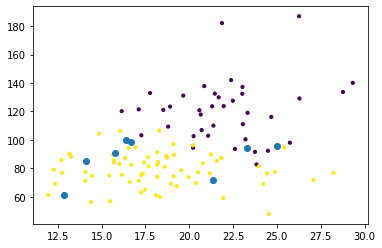

In [29]:
miss_classify = np.where(y_test!=y_predict)
plt.scatter(X_test[:,1],X_test[:,2],c=y_predict,s=10)
plt.scatter(X_test[miss_classify,1],X_test[miss_classify,2])

###### Naive Bayes Scikit learn

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB(var_smoothing=0)
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.9298245614035088

**Summary**<br>
so we talked about 3 classification algorithms:
   * GDA which uses multivariate gaussian
   * LDA which uses multivariate Gaussians with equal covariance
   * Naive Bayes which assumes all the features are independent of each other<br>

and each method has its pros and cons, so for different problems, we can choose the different variant of Gaussian methods.

### Clustering using generative models - Gaussian Mixture Model

clustering is the task of finding groups in our dataset. the idea of the Gaussian Mixture Method (GMM) is that we have ${k}$ number of components in our dataset, and we approximate each group with Gaussian distribution (in other words we map ${k}$ distribution on our data), so each component will have $\mu_{i}$ and $\Sigma_{i}$, and the goal is to find these means and covariances. so we will have:<br>

$$ f_{i}(X) = f(X\vert \mu_{i}, \Sigma_{i}) = \frac{1}{(\sqrt{2\pi})^{n} (\sqrt{\vert \Sigma_{i} \vert})}exp (- \frac{(X-\mu_{i})^{T} \Sigma_{i}^{-1} (X-\mu_{i})}{2})$$<br>

$$p(X) = \sum\limits _{i} ^{k} f_{i}(X) p(c_{i})$$<br>

so like before we have to use log-likelihood estimation and maximize it to find our parameters. but there is a problem because our data is unlabeled we can't directly find our parameters, instead, we use the **Expectation-Maximization** method to find the maximum likelihood estimation of our parameters.<br>

**Expectation-Maximization Algorithm:**<br>
Expectation-Maximization (EM) algorithm is 2 steps iterative approach that starts with an initial guess for our parameters then:<br>
   1. Expectation Step: given parameters we compute posterior probabilities $p(c_{i}\vert X)$ via Bayes Theorem:<br>
   
       $${p}(c_{i}\vert X) = \frac{{p}(X\vert c_{i}) . {p}(c_{i})}{\sum \limits _{i}{p}(X\vert c_{i}) . {p}(c_{i}) }$$
       
       and each component is modeled as multivariate Gaussian distribution. these posterior probabilities are our weights and we can think of them as how much each point is assigned to the $\mu_{i}$ (contribution of each point to cluster ${i}$).
       
   2. Maximization Step: we use the calculated weights to update our parameters $\mu_{i}$, $\Sigma_{i}$, $p(c_{i})$.
       * re-estimate $\mu_{i}$ with the weighted average of all the points
       * re-estimate $\Sigma_{i}$ with the weighted covariance over all the points
       * re-estimate $p(c_{i})$ with fraction of weights that contribute to that component<br>

after some iteration our $\mu_{i}$ will converge to some values, and those values will be the centers of our clusters.

#### Pseudo code for GMM - EM algorithm

1. Randomly initialize $\mu_{i}$. we can select uniformly random values from the possible range of X
2. initialize covariance matrix. $\Sigma_{i} = {I}$ (identity matrix)
3. initialize prior probabilities $p(c_{i}) = \frac{1}{k}$ (equal probability)
4. Expectation Step:<br>

    $ W_{i} = \frac{{f}(X\vert \mu_{i},\Sigma_{i}) . {p}(c_{i})}{\sum \limits _{i} ^{k}{p}(X\vert \mu_{i},\Sigma_{i}) . {p}(c_{i}) }$<br>
    
5. Maximization Step:<br>
    * $\mu_{i}$ for next step:  $\mu_{i} = \frac{\sum\limits _{j} ^{m} w_{ij}X_{j}}{\sum\limits _{j} ^{m} w_{ij}}$<br>
    
    * $\Sigma_{i}$ for next step: $\Sigma_{i} = \frac{\sum\limits _{j} ^{m} w_{ij}(X_{j} -\mu_{i})(X_{j} -\mu_{i})^{T}}{\sum\limits _{j} ^{m} w_{ij}}$
    
    * $p(c_{i})$ for next step:  $p(c_{i}) = \frac{1}{m}\sum\limits _{j} ^{m}w_{ij}$

6. repeat step 4,5 until we reach the maximum number of iterations or some threshold:<br>
    
    $$\sum\limits _{i} ^{k}\vert\vert \mu_{new} - \mu_{old}\vert \vert ^{2} \leq \epsilon$$
    

#### GMM from scratch

**NOTE:** as you already saw in other chapters, when I code algorithms from scratch I try to code as simple as possible because our purpose is to learn algorithms and don't distract by code complexity. but because we already work with covariances and means, I code a little, seriously a little, more complex.

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

(-15.0, 15.0)

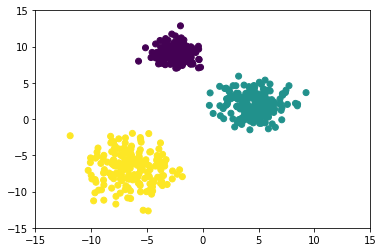

In [33]:
X,y,centers = make_blobs(n_samples=600,n_features=2,cluster_std=[1,1.5,2],return_centers=True,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim([-15,15])
plt.ylim([-15,15])

In [34]:
m,n = X.shape
k = np.unique(y).shape[0]

In [35]:
#initializing our mu
np.random.seed(42)
x1_mu = np.random.choice(X[:,0],k)
x2_mu = np.random.choice(X[:,1],k)
x1_mu = x1_mu.reshape(k,1)
x2_mu = x2_mu.reshape(k,1)
mu = np.concatenate((x1_mu,x2_mu),axis=1)
mu.shape

(3, 2)

(-15.0, 15.0)

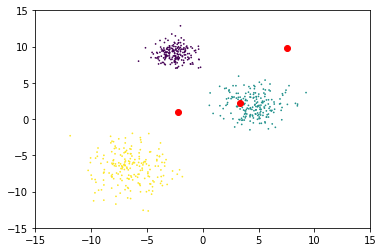

In [36]:
plt.scatter(X[:,0],X[:,1],c=y,s=0.5)
plt.scatter(mu[:,0],mu[:,1],c='r')
plt.xlim([-15,15])
plt.ylim([-15,15])

the red points are our initial clusters centers

In [37]:
#initialize prior probabilities
p = np.zeros((k,1))
for i in range(k):
    p[i] = 1/k

In [38]:
# initialize covariance matrices
sigma = np.zeros((k,n,n))
for i in range(k):
    sigma[i] = np.eye(n)

In [39]:
# our Multivariate Gaussian function
from numpy.linalg import multi_dot
def MultiGaussian(x,mu,cov):
    invcov = np.linalg.inv(cov)
    detcov = np.linalg.det(cov)
    n = x.shape[1]
    f=[]
    denom = ((np.sqrt(2*np.pi))**n)*(np.sqrt(detcov))
    for i in range(len(X)):
        Q = (multi_dot([(x[i]-mu),invcov,(x[i]-mu).T]))/2
        f.append(np.exp(-Q)/denom)
    
    
    return np.array(f)

In [40]:
#EM steps
f = np.zeros((k,m))
num = np.zeros((k,m))
Xbar= np.zeros((k,m,n))
new_sigma = np.zeros((k,n,n))
for iteration in range(200):
    for i in range(k):
        f[i] = MultiGaussian(X,mu[i],sigma[i])
        num[i] = f[i]*p[i]
    denom = np.sum(num,axis=0,keepdims=True)
    w = (num/denom).T #weights
    sumw = (np.sum(w,axis=0,keepdims=True)).T #sum of weights
    new_p = (sumw/m) # new prior probability
    new_mu = np.dot(w.T,X)/sumw # new centers
    for i in range(k):
        Xbar[i] = X - new_mu[i]
        new_sigma[i] = np.cov(Xbar[i].T,aweights=(w[:,i]/sumw[i]).flatten(), bias=True) # new covariance
    mu = new_mu
    sigma = new_sigma
    p = new_p

(-15.0, 15.0)

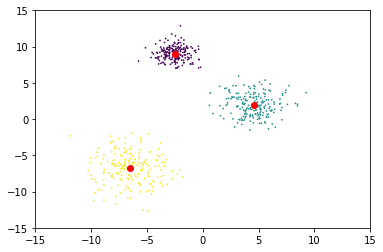

In [46]:
plt.scatter(X[:,0],X[:,1],c=y,s=0.5)
plt.scatter(mu[:,0],mu[:,1],c='r')
plt.xlim([-15,15])
plt.ylim([-15,15])

finial clusters centers

In [41]:
mu #calculated center of clusters

array([[-6.4837452 , -6.74083782],
       [ 4.56848945,  1.93913877],
       [-2.517623  ,  9.04765746]])

In [42]:
centers # true center of clusters

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959]])

pretty close ha? that's feels good :)

#### GMM in scikit learn

In [43]:
from sklearn.mixture import GaussianMixture

In [44]:
gmm = GaussianMixture(n_components=3,random_state=42)
gmm.fit(X)
gmm.means_

array([[-2.517623  ,  9.04765746],
       [-6.4837452 , -6.74083782],
       [ 4.56848945,  1.93913877]])